In [41]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy.optimize import curve_fit
from scipy.signal import find_peaks,peak_widths
from scipy.special import wofz

In [445]:
#Obtención de los datos
def Data(l:str):
    direccion = l
    data = pd.read_csv(direccion, delimiter='\t')
    return data

#Actividad 1
Data1A1 = Data(r'C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\Datos de actividad 1 3 a 55 grados')

#Actividad 2 calibración
Data1A2 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\Datos 2 cristal LiF sin material 6 a 16 grados")

#Actividad 2 Al
Data2A2 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\datos 2 cristal LiF Al002 6 a 16 grados")
Data3A2 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\Datos 2 cristal LiF Al004 6 a 16 grados")
Data4A2 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\datos 2 cristal LiF Al006 6 a 16 grados")
Data5A2 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\datos 2 cristal LiF Al008 6 a 16 grados")

#Actividad 2 Zn
Data6A2 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\datos 2 cristal Zn 0025 6 a 16 grados")
Data7A2 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\datos 2 cristal Zn 005 6 a 16 grados")
Data8A2 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\datos 2 cristal Zn 0075 6 a 16 grados")
Data9A2 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\datos 2 cristal Zn 001 6 a 16 grados")

#Actividad 3
Data1A3 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\datos 3 I 01 constante V 35kV 17 a 27 grados")
Data2A3 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\Datos 3 V constante I 01 16 a 27 grados")

#Actividad 4
Data1A4 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\datos 4 I constante y lente 2mm")


**Actividad 1: Rayos x característicos del cobre.**

In [340]:
#Parámetros y funciones globales
dZn = 2.014 #x10^(-10) m 
dKBr = 3.290 #x10^(-10) m

#Ajuste Lorentziano: h peak height, x0 peak position, W peak width peak_widths
def Lorentzian(x,h,x0,W):
    return h*W**2/((x-x0)**2+W**2)

#Ajuste Gaussiano
def Gauss(x, y0, a, x0, sigma):
    return y0 + a * np.exp(-(x - x0)**2 / (2 * sigma**2))

#Ajuste de Voight: X x-values, sigma Gaussian standard deviation, gamma Lorentzian full-width at half-maximum
def Voigt(x, amplitude, center, sigma, gamma):
    z = ((x - center) + 1j * gamma) / (sigma * np.sqrt(2))
    v = amplitude * wofz(z).real / (sigma * np.sqrt(2 * np.pi))
    return v

#Residuales 
def Residuals(y,ym):
    e = []
    for i in range(0,len(y)):
        e.append(y[i]-ym[i])
    return e

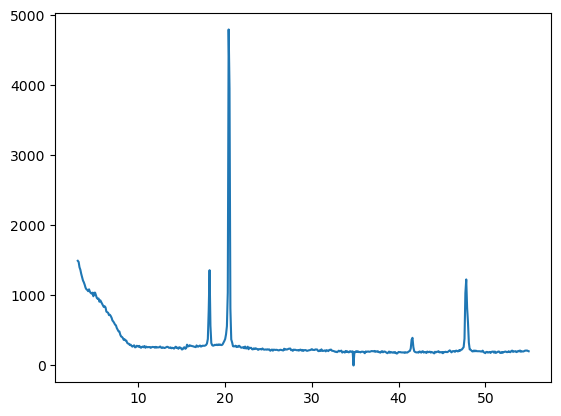

In [48]:
#Grafica general para visualizar los datos
plt.plot(Data1A1['Ang'],Data1A1['In'])
xb = Data1A1['Ang']
yb = Data1A1['In']


Ajuste Lorentziano
La longitud de onda de K alfa es 1.41 y de K beta es 1.26 Armstrong; sus incertidumbres son 0.0002 y 0.002 respectivamente
Perfil de Voigt
La longitud de onda de K alfa es 1.41 y de K beta es 1.26 Armstrong; sus incertidumbres son 0.0005 y 0.003 respectivamente
Las energías para alfa y beta serán 0.88 y 0.99 Kv


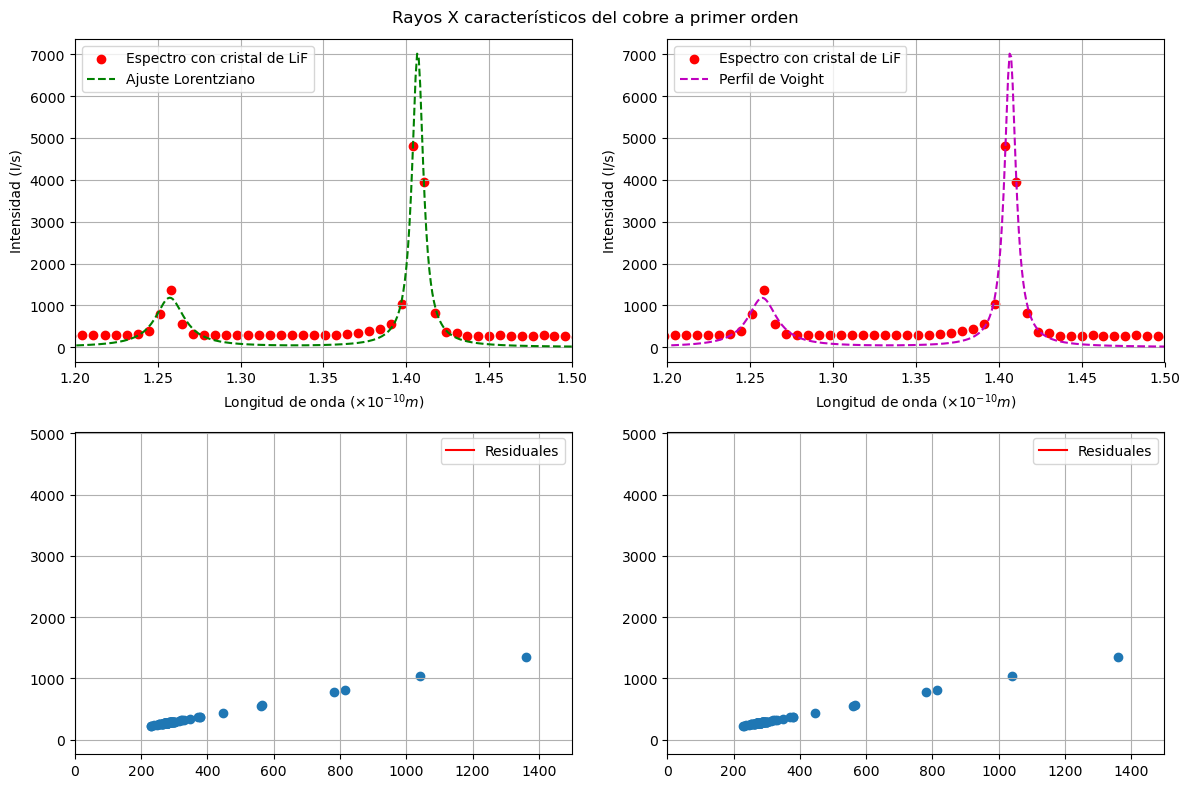

In [376]:
#Cambiar de ángulo a longitud de onda utilizando la ley de Bragg 
#Para mejor calidad se tomó solo los ángulos donde se sabe que aparecen los picos
x = []
y = []
xa = []
ya = []
xaa = []
yaa = []
xb = []
yb = []

for i in range(0,521):
    if Data1A1['Ang'][i]>=15.0 and Data1A1['Ang'][i]<22.0: 
        #Se le aplica el factor de calibracion de 2.1 grados a los datos de angulo
        x.append(2*dZn*(np.sin(np.radians(Data1A1['Ang'][i])))/1)
        y.append(Data1A1['In'][i])

for i in range(0,len(x)):
    if x[i]>=1.23 and x[i]<1.35: 
            xb.append(x[i])
            yb.append(y[i])
    if x[i]>=1.28 and x[i]<1.43: 
            xa.append(x[i])
            ya.append(y[i])
    if x[i]>=1.40 and x[i]<1.5: 
            xaa.append(x[i])
            yaa.append(y[i])

#Ajuste Lorentziano, como los datos no son del todo continuos, el ancho de la curva a la mitad de la altura se realizó estimando.
popt1, pcov1 = curve_fit(Lorentzian,xdata=xb, ydata=yb)
popt11, pcov11 = curve_fit(Lorentzian,xdata=xa, ydata=ya)
popt111, pcov111 = curve_fit(Lorentzian,xdata=xaa, ydata=yaa)

ha = popt11[0]
x0a = popt11[1]
Wa = popt11[2]
errora = np.sqrt(np.diag(pcov11)) #Desviación estándar dada por el ajuste


hb = popt1[0]
x0b = popt1[1]
Wb = popt1[2]
errorb = np.sqrt(np.diag(pcov1)) #Desviación estándar dada por el ajuste

haa = popt111[0]
x0aa = popt111[1]
Waa = popt111[2]
erroraa = np.sqrt(np.diag(pcov111)) #Desviación estándar dada por el ajuste

x1_ = np.linspace(min(x),max(x),500)

#Perfil de Voight
poptgb, pcovgb = curve_fit(Gauss,xdata=xb,ydata=yb)
sigmab = poptgb[3]
poptb, pcovb = curve_fit(Voigt,xdata=xb, ydata=yb,p0=(4500, x0b, sigmab, Wb) )
amplitude_fitb, center_fitb, sigma_fitb, gamma_fitb = poptb
errorvb = np.sqrt(np.diag(pcovb))

poptga, pcovga = curve_fit(Gauss,xdata=xa,ydata=ya)
sigmaa = poptga[3]
popta, pcova = curve_fit(Voigt,xdata=xa, ydata=ya,p0=(4500, x0a, sigmaa, Wa) )
amplitude_fita, center_fita, sigma_fita, gamma_fita = popta
errorva = np.sqrt(np.diag(pcova))

poptgaa, pcovgaa = curve_fit(Gauss,xdata=xa,ydata=ya)
sigmaa = poptgaa[3]
poptaa, pcovaa = curve_fit(Voigt,xdata=xa, ydata=ya,p0=(4500, x0a, sigmaa, Wa) )
amplitude_fitaa, center_fitaa, sigma_fitaa, gamma_fitaa = poptaa
errorvaa = np.sqrt(np.diag(pcovaa))

#Cálculo de energías y longitudes de onda.
print('Ajuste Lorentziano')
print('La longitud de onda de K alfa es {} y de K beta es {} Armstrong; sus incertidumbres son {} y {} respectivamente'.format(round(x0a,2),round(x0b,2),round(errora[1],4),round(errorb[1],3)))
print('Perfil de Voigt')
print('La longitud de onda de K alfa es {} y de K beta es {} Armstrong; sus incertidumbres son {} y {} respectivamente'.format(round(center_fita,2),round(center_fitb,2),round(errorva[1],4),round(errorvb[1],3)))
Ea = 12.40 / (x0a*10) #Esto para que quede nm KV/nm
Eb = 12.40 / (x0b*10) #Esto para que quede nm KV/nm
print('Las energías para alfa y beta serán {} y {} Kv'.format(round(Ea,2),round(Eb,2)))

#Gráfico
fig = plt.figure(figsize = (12, 8))
fig.suptitle('Rayos X característicos del cobre a primer orden')
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
#Plots de residuos
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)


ax1.scatter(x,y,color='r',label=r'Espectro con cristal de LiF')
ax1.plot(x1_,Lorentzian(x1_,hb,x0b,Wb)+Lorentzian(x1_,ha,x0a,Wa),'--',color='g', label=r'Ajuste Lorentziano')
ax1.set_xlim(1.2,1.5)
ax1.set_xlabel(r"Longitud de onda $(\times 10^{-10}m)$")
ax1.set_ylabel('Intensidad (I/s)')
ax1.grid()
ax1.legend()

rL = Residuals(y,Lorentzian(x1_,hb,x0b,Wb)+Lorentzian(x1_,ha,x0a,Wa))
rV = Residuals(y,Voigt(x1_,amplitude_fitb, center_fitb, sigma_fitb, gamma_fitb)+Voigt(x1_,amplitude_fita, center_fita, sigma_fita, gamma_fita))

ax3.scatter(y,rL)
ax3.plot(x,np.zeros_like(x),color='r',label = 'Residuales')
ax3.set_xlim(0,1500)
ax3.grid()
ax3.legend()

ax2.scatter(x,y,color='r',label=r'Espectro con cristal de LiF')
ax2.plot(x1_,Voigt(x1_,amplitude_fitb, center_fitb, sigma_fitb, gamma_fitb)+Voigt(x1_,amplitude_fita, center_fita, sigma_fita, gamma_fita),'--',color='m', label=r'Perfil de Voight')
ax2.set_xlim(1.2,1.5)
ax2.set_xlabel(r"Longitud de onda $(\times 10^{-10}m)$")
ax2.set_ylabel('Intensidad (I/s)')
ax2.grid()
ax2.legend()

ax4.scatter(y,rV)
ax4.plot(x,np.zeros_like(x),color='r',label = 'Residuales')
ax4.set_xlim(0,1500)
ax4.grid()
ax4.legend()

fig.tight_layout()

Ajuste Lorentziano
La longitud de onda de K alfa es 1.49 y de K beta es 1.34 Armstrong; sus incertidumbres son 0.0004 y 0.001 respectivamente
Perfil de Voigt
La longitud de onda de K alfa es 1.49 y de K beta es 1.34 Armstrong; sus incertidumbres son 0.0004 y 0.001 respectivamente
Las energías para alfa y beta serán 0.83 y 0.93 Kv


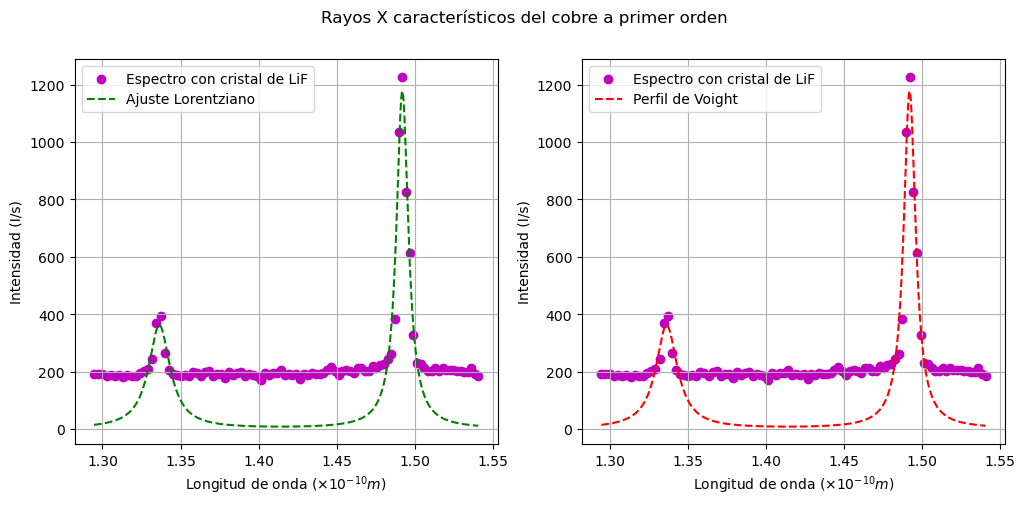

In [338]:
#Cambiar de ángulo a longitud de onda utilizando la ley de Bragg 
#Para mejor calidad se tomó solo los ángulos donde se sabe que aparecen los picos
x = []
y = []
xa = []
ya = []
xb = []
yb = []

for i in range(0,521):
    if Data1A1['Ang'][i]>=40.0 and Data1A1['Ang'][i]<50.0: 
        #Se le aplica el factor de calibracion de 2.1 grados a los datos de angulo
        x.append(2*dZn*(np.sin(np.radians(Data1A1['Ang'][i])))/2)
        y.append(Data1A1['In'][i])

for i in range(0,len(x)):
    if x[i]>=1.33 and x[i]<1.35: 
            xb.append(x[i])
            yb.append(y[i])
    if x[i]>=1.47 and x[i]<1.51: 
            xa.append(x[i])
            ya.append(y[i])

#Ajuste Lorentziano, como los datos no son del todo continuos, el ancho de la curva a la mitad de la altura se realizó estimando.
popt1, pcov1 = curve_fit(Lorentzian,xdata=xb, ydata=yb)
popt11, pcov11 = curve_fit(Lorentzian,xdata=xa, ydata=ya)

ha = popt11[0]
x0a = popt11[1]
Wa = popt11[2]
errora = np.sqrt(np.diag(pcov11)) #Desviación estándar dada por el ajuste

hb = popt1[0]
x0b = popt1[1]
Wb = popt1[2]
errorb = np.sqrt(np.diag(pcov1)) #Desviación estándar dada por el ajuste

x1_ = np.linspace(min(x),max(x),500)

#Perfil de Voight
poptgb, pcovgb = curve_fit(Gauss,xdata=xb,ydata=yb)
sigmab = poptgb[3]
poptb, pcovb = curve_fit(Voigt,xdata=xb, ydata=yb,p0=(4500, x0b, sigmab, Wb) )
amplitude_fitb, center_fitb, sigma_fitb, gamma_fitb = poptb
errorvb = np.sqrt(np.diag(pcovb))

poptga, pcovga = curve_fit(Gauss,xdata=xa,ydata=ya)
sigmaa = poptgb[3]
popta, pcova = curve_fit(Voigt,xdata=xa, ydata=ya,p0=(4500, x0a, sigmaa, Wa) )
amplitude_fita, center_fita, sigma_fita, gamma_fita = popta
errorva = np.sqrt(np.diag(pcova))

#Cálculo de energías y longitudes de onda.
print('Ajuste Lorentziano')
print('La longitud de onda de K alfa es {} y de K beta es {} Armstrong; sus incertidumbres son {} y {} respectivamente'.format(round(x0a,2),round(x0b,2),round(errora[1],4),round(errorb[1],3)))
print('Perfil de Voigt')
print('La longitud de onda de K alfa es {} y de K beta es {} Armstrong; sus incertidumbres son {} y {} respectivamente'.format(round(center_fita,2),round(center_fitb,2),round(errorva[1],4),round(errorvb[1],3)))
Ea = 12.40 / (x0a*10) #Esto para que quede nm KV/nm
Eb = 12.40 / (x0b*10) #Esto para que quede nm KV/nm
print('Las energías para alfa y beta serán {} y {} Kv'.format(round(Ea,2),round(Eb,2)))

#Gráfico
fig = plt.figure(figsize = (12, 5))
fig.suptitle('Rayos X característicos del cobre a primer orden')
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


ax1.scatter(x,y,color='m',label=r'Espectro con cristal de LiF')
ax1.plot(x1_,Lorentzian(x1_,hb,x0b,Wb)+Lorentzian(x1_,ha,x0a,Wa),'--',color='g', label=r'Ajuste Lorentziano')
ax1.set_xlabel(r"Longitud de onda $(\times 10^{-10}m)$")
ax1.set_ylabel('Intensidad (I/s)')
ax1.grid()
ax1.legend()

ax2.scatter(x,y,color='m',label=r'Espectro con cristal de LiF')
ax2.plot(x1_,Voigt(x1_,amplitude_fitb, center_fitb, sigma_fitb, gamma_fitb)+Voigt(x1_,amplitude_fita, center_fita, sigma_fita, gamma_fita),'--',color='r', label=r'Perfil de Voight')
ax2.set_xlabel(r"Longitud de onda $(\times 10^{-10}m)$")
ax2.set_ylabel('Intensidad (I/s)')
ax2.grid()
ax2.legend()

**Actividad 2: Absorción de rayos x como función del espesor del material.**

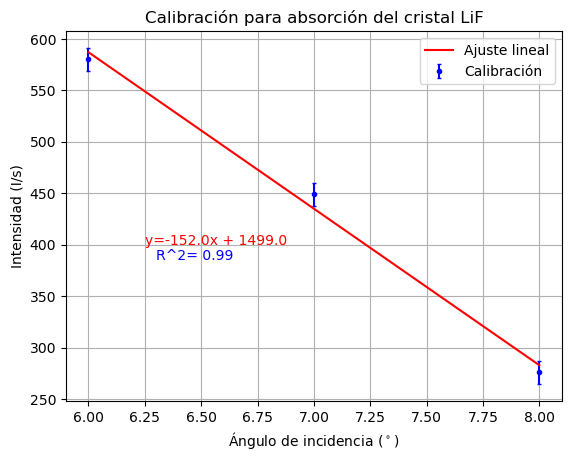

In [420]:
#Calibración de barrido sin material
n = 1
param1 = np.polyfit(Data1A2['Ang'][0:3], Data1A2['In'][0:3], n)

x_ = np.linspace(min(Data1A2['Ang'][0:3]),max(Data1A2['Ang'][0:3]),10)
ym1 = param1[0]*x_+param1[1]

#Obtener medidas de incertidumbre

def GetR2(x,y):
    matrix = np.corrcoef(x, y)
    R2 = (matrix[0,1])**2
    return R2

std = np.std(Data1A2['In'][0:3])
var = np.var(Data1A2['In'][0:3])

#Residuales 
def Residuals(y,ym):
    e = []
    for i in range(0,len(y)):
        e.append(y[i]-ym[i])
    return e

plt.errorbar(Data1A2['Ang'][0:3], Data1A2['In'][0:3],yerr=np.sqrt(std),capsize=1.5,color='b',fmt='.', label='Calibración')
plt.plot(x_,ym1,color='r',label='Ajuste lineal')
plt.title('Calibración para absorción del cristal LiF')
plt.ylabel('Intensidad (I/s)')
plt.xlabel(r'Ángulo de incidencia $(^\circ)$')
plt.text(6.25, 400, 'y={}x + {}'.format(round(param1[0],2),round(param1[1],2)),color='r')
plt.text(6.30,385,'R^2= {}'.format(round(GetR2(Data1A2['Ang'][0:3], Data1A2['In'][0:3]),2)),color='b')
plt.legend()
plt.grid()
plt.show()

In [444]:
#Graficar el logaritmo de I normalizada con la calibración contra espesor de material (se itera sobre cada longitud de onda)
# x=[] #longitud de onda
# ya=[] #Intensidad normalizada para Al
# yz=[] #Intensidad normalizada para Zn
# IA = [Data2A2['In'][0:4],Data3A2['In'][0:4],Data4A2['In'][0:4],Data5A2['In'][0:4]]
# IZ = [Data6A2['In'][0:4],Data7A2['In'][0:4],Data8A2['In'][0:4],Data9A2['In'][0:4]]
# for i in range(0,9):
#     x.append(2*dZn*(np.sin(np.radians(Data2A2['Ang'][i]))))
#     a=[]
#     b=[]
#     for j in IA:
#         a.append(IA[j][i]/-param1[0])
#         b.append(IZ[j][i]/-param1[0])
#     ya.append(a)
#     yz.append(b)

# plt.plot(x[0:3],ya)
# plt.xscale('log')
DataA2

,Ang,In
0,6.0,18.0
1,7.0,10.0
2,8.0,8.0
3,9.0,7.0
4,10.0,7.0
5,11.0,6.0
6,12.0,7.0
7,13.0,7.0
8,14.0,6.0
9,15.0,6.0


**Actividad 3:Dependencia de la intensidad del voltaje y corriente del ánodo.**

In [408]:
#Datos organizados por la variable constante
Icon = [Data1A3['11kV'],Data1A3['13kV'],Data1A3['15kV'],Data1A3['17kV'],Data1A3['19kV'],Data1A3['21kV'],Data1A3['23kV'],Data1A3['25kV'],Data1A3['27kV'],Data1A3['29kV'],Data1A3['31kV'],Data1A3['33kV'],Data1A3['35kV']]
Vcon = [Data2A3['0.1mA'],Data2A3['0.2mA'],Data2A3['0.3mA'],Data2A3['0.4mA'],Data2A3['0.5mA'],Data2A3['0.6mA'],Data2A3['0.7mA'],Data2A3['0.8mA'],Data2A3['0.9mA'],Data2A3['1mA']]

xI = [] #Longitudes de onda para corriente constante
bI = []
covI = []
FitI = []
uaI = np.arange(11,35,2) #Valores de voltaje 

xV = [] #Longitudes de onda para voltaje constante
bV = []
covV = []
FitV = []
IA = np.arange(0.1,1,0.1) #Valores de corriente

#Hallar longitudes de onda para cada ángulo
for i in range(0,len(Data2A3['Ang'])):
    xI.append(2*dZn*(np.sin(np.radians(Data1A3['Ang'][i]-2.0))))

for i in range(0,len(Data2A3['Ang'])):
    xV.append(2*dZn*(np.sin(np.radians(Data2A3['Ang'][i]-2.0))))

#Ajuste de cada tipo para la grafica con corriente constante: Corriente del ánodo 1mA
def U(I,b):
    return I*(1/(b))

for i in range(0,len(uaI)):
    popt, pcov = curve_fit(U,xdata=xI, ydata=Icon[i])
    b = popt[0]
    bI.append(round(b,5))
    covI.append(np.sqrt(np.diag(pcov)))
    F = U(Icon[i],b*10*(uaI[i]-9.979)**(3/2))
    FitI.append(F)

for i in range(0,len(IA)):
    popt, pcov = curve_fit(U,xdata=xV, ydata=Vcon[i])
    b = popt[0]
    bV.append(round(b,5))
    covV.append(np.sqrt(np.diag(pcov)))
    F = U(Vcon[i],b*IA[i])
    FitV.append(F)

print("Los valores de la constante 1/b manteniendo corriente constante halladas fueron: {}".format(bI))
print("Los valores de error en el cálculo de cada constante b fueron: {}".format(covI))

print("Los valores de la constante 1/b manteniendo voltaje constante halladas fueron: {}".format(bV))
print("Los valores de error en el cálculo de cada constante b fueron: {}".format(covV))

# np.mean(bV)
# np.mean(covV)

Los valores de la constante 1/b manteniendo corriente constante halladas fueron: [0.08254, 0.02059, 0.0108, 0.00726, 0.00531, 0.00423, 0.00355, 0.00311, 0.00274, 0.00245, 0.00205, 0.00266]
Los valores de error en el cálculo de cada constante b fueron: [array([0.01671942]), array([0.00620202]), array([0.00349353]), array([0.00226895]), array([0.00160544]), array([0.00124106]), array([0.00101759]), array([0.00088307]), array([0.00077069]), array([0.00067757]), array([0.00053844]), array([0.00057863])]
Los valores de la constante 1/b manteniendo voltaje constante halladas fueron: [0.0181, 0.00875, 0.00587, 0.00428, 0.00347, 0.00296, 0.00256, 0.00227, 0.00203]
Los valores de error en el cálculo de cada constante b fueron: [array([0.00474426]), array([0.00225139]), array([0.00144916]), array([0.0010161]), array([0.00081325]), array([0.00068418]), array([0.00057909]), array([0.00050936]), array([0.00045004])]


0.0013885363285927222

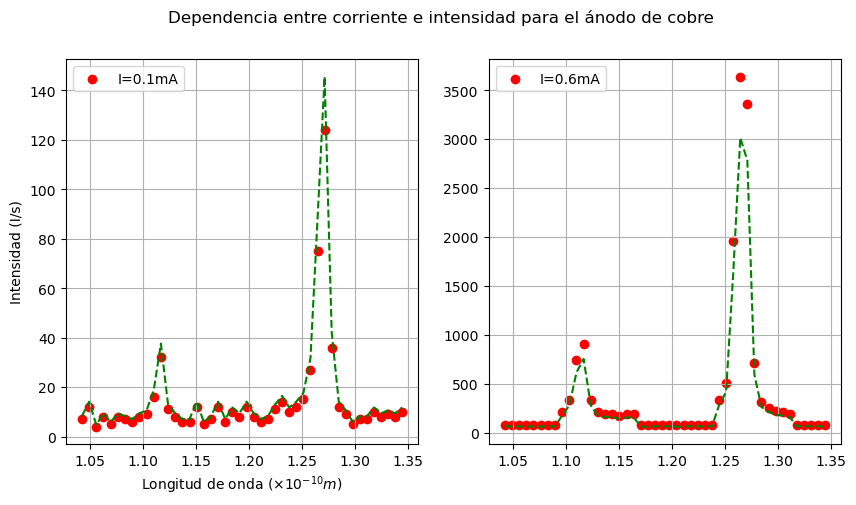

In [402]:
#Grafico
fig = plt.figure(figsize = (10, 5))
fig.suptitle('Dependencia entre corriente e intensidad para el ánodo de cobre')
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


ax1.scatter(xI,Icon[0],label='I=0.1mA',color='r')
ax1.plot(xI,FitI[0],'--',color='g',label='Ajuste de intensidad')
ax1.set_xlabel(r"Longitud de onda $(\times 10^{-10}m)$")
ax1.set_ylabel('Intensidad (I/s)')
ax1.grid()
ax1.legend()

ax2.scatter(xI,Icon[7],label='I=0.6mA',color='r')
ax2.plot(xI,FitI[7]*1.5,'--',color='g',label='Ajuste de intensidad')
ax1.set_xlabel(r"Longitud de onda $(\times 10^{-10}m)$")
ax1.set_ylabel('Intensidad (I/s)')
ax2.grid()
ax2.legend()

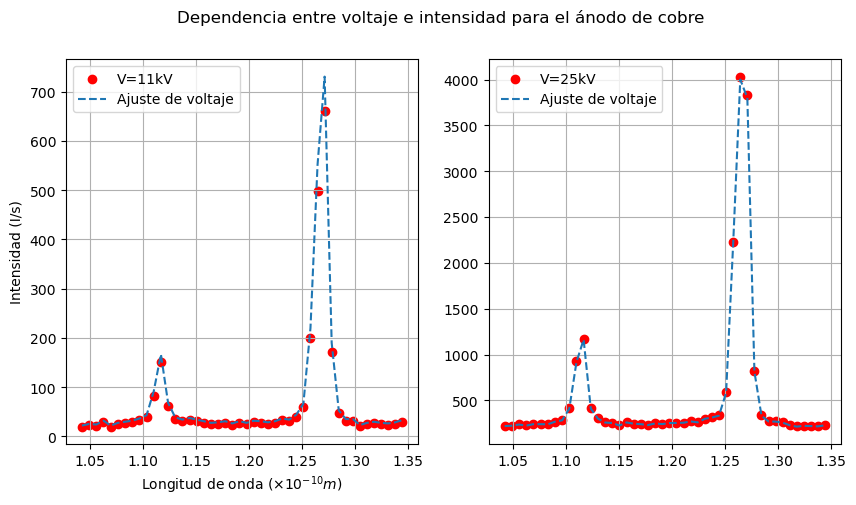

In [403]:
#Grafico
fig = plt.figure(figsize = (10, 5))
fig.suptitle('Dependencia entre voltaje e intensidad para el ánodo de cobre')
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


ax1.scatter(xV,Vcon[0],label='V=11kV',color='r')
ax1.plot(xV,FitV[0]*0.002,'--',label='Ajuste de voltaje')
ax1.set_xlabel(r"Longitud de onda $(\times 10^{-10}m)$")
ax1.set_ylabel('Intensidad (I/s)')
ax1.grid()
ax1.legend()

ax2.scatter(xV,Vcon[7],label='V=25kV',color='r')
ax2.plot(xV,FitV[7]*0.0018,'--',label='Ajuste de voltaje')
ax1.set_xlabel(r"Longitud de onda $(\times 10^{-10}m)$")
ax1.set_ylabel('Intensidad (I/s)')
ax2.grid()
ax2.legend()

**Actividad 4:Ley de Duane-Hunt.**

In [ ]:
#Para regresiones lineales o polinómicas de cualquier orden
# n = 1
# param = np.polyfit(x, y, n)

# _x = np.linspace(0,10,2)

# param = GetFit(x,y)
# ym = GetModel(_x,param_az)

In [ ]:
#Obtener medidas de incertidumbre

# def GetR2(x,y):
#     matrix = np.corrcoef(x, y)
#     R2 = (matrix[0,1])**2
#     return R2

#Desviacion estandar
#std = np.std(x,axis=0)
#Varianza
#var = np.var(x,axis=0)

#Residuales 
# def Residuals(y,ym_az):
#     e = []
#     for i in range(0,len(y)):
#         e.append(y[i]-ym[i])
#     return e

In [ ]:
#Graficas
# plt.errorbar(x, y,xerr,capsize=1.5,color='b',fmt='.')
# plt.plot(x,y,color='b')
# plt.title('Gráfica')
# plt.xlabel('C')
# plt.ylabel('V')
# plt.text(6, 7.5, 'y={}x + {}'.format(round(param[1],2),round(param[0],2)),color='b')
# plt.text(6,7.1,'R^2= {}'.format(round(GetR2(x,y),2)),color='b')
# plt.legend()
# plt.show()

In [ ]:
#Grafica de dos o mas plots
# fig = plt.figure(figsize = (10, 5))
# ax1 = fig.add_subplot(121)
# ax2 = fig.add_subplot(122)


# ax1.plot(xI,yI)
# ax2.plot(xI,yV)

# ax1.grid()
# ax2.grid()

# ax1.legend()
# plt.show()